C:\Users\dishy\AppData\Local\Temp\ipykernel_5148\132331436.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('C:/Users/dishy/OneDrive/Documents/GitHub/JPMorgan-Chase-Quantitative-Research-job-simulation/TASK 1/Nat_Gas.csv', parse_dates=['Dates'])


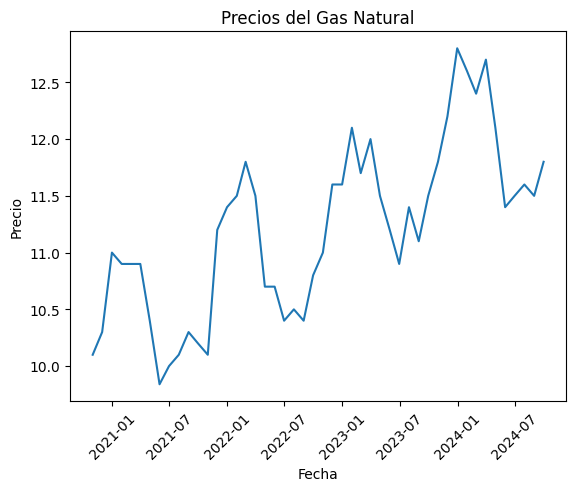

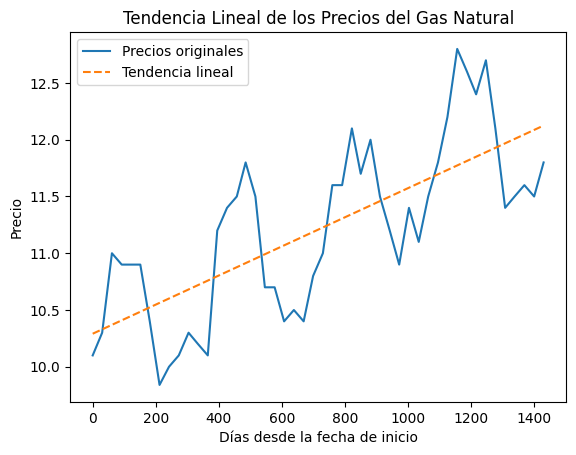

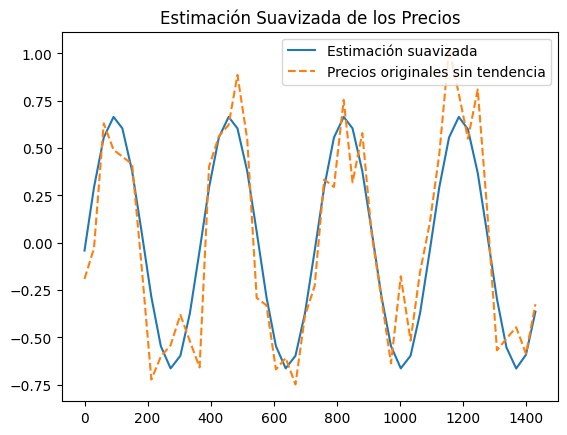

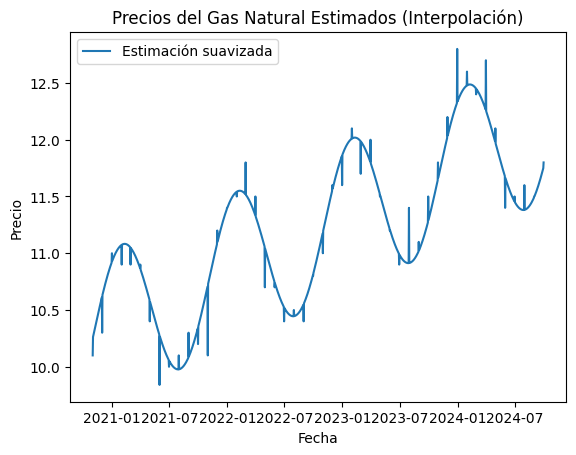

In [4]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import date, timedelta

# Cargar el archivo CSV con los datos
df = pd.read_csv('C:/Users/dishy/OneDrive/Documents/GitHub/JPMorgan-Chase-Quantitative-Research-job-simulation/TASK 1/Nat_Gas.csv', parse_dates=['Dates'])

# Extraer precios y fechas
prices = df['Prices'].values
dates = df['Dates'].values

# Graficar los precios contra las fechas
fig, ax = plt.subplots()
ax.plot(dates, prices, '-')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio')
ax.set_title('Precios del Gas Natural')
ax.tick_params(axis='x', rotation=45)
plt.show()

# Regresión lineal para capturar la tendencia general
start_date = date(2020, 10, 31)
end_date = date(2024, 9, 30)

# Generar una lista de fechas mensuales
months = []
year = start_date.year
month = start_date.month + 1
while True:
    current = date(year, month, 1) + timedelta(days=-1)
    months.append(current)
    if current.month == end_date.month and current.year == end_date.year:
        break
    else:
        month = ((month + 1) % 12) or 12
        if month == 1:
            year += 1

# Convertir las fechas en número de días desde la fecha de inicio
days_from_start = [(day - start_date).days for day in months]

# Función para realizar la regresión lineal simple
def simple_regression(x, y):
    xbar = np.mean(x)
    ybar = np.mean(y)
    slope = np.sum((x - xbar) * (y - ybar)) / np.sum((x - xbar) ** 2)
    intercept = ybar - slope * xbar
    return slope, intercept

# Convertir a array de NumPy para realizar la regresión
time = np.array(days_from_start)
slope, intercept = simple_regression(time, prices)

# Graficar la tendencia lineal
plt.plot(time, prices, label='Precios originales')
plt.plot(time, time * slope + intercept, label='Tendencia lineal', linestyle='--')
plt.xlabel('Días desde la fecha de inicio')
plt.ylabel('Precio')
plt.title('Tendencia Lineal de los Precios del Gas Natural')
plt.legend()
plt.show()

# Ajuste sinusoidal para capturar la estacionalidad (ciclos anuales)
sin_prices = prices - (time * slope + intercept)
sin_time = np.sin(time * 2 * np.pi / 365)
cos_time = np.cos(time * 2 * np.pi / 365)

# Función para realizar la regresión bilineal
def bilinear_regression(y, x1, x2):
    slope1 = np.sum(y * x1) / np.sum(x1 ** 2)
    slope2 = np.sum(y * x2) / np.sum(x2 ** 2)
    return slope1, slope2

slope1, slope2 = bilinear_regression(sin_prices, sin_time, cos_time)

# Recuperar la amplitud y el desplazamiento de fase
amplitude = np.sqrt(slope1 ** 2 + slope2 ** 2)
shift = np.arctan2(slope2, slope1)

# Graficar la estimación suavizada del dataset completo
plt.plot(time, amplitude * np.sin(time * 2 * np.pi / 365 + shift), label='Estimación suavizada')
plt.plot(time, sin_prices, label='Precios originales sin tendencia', linestyle='--')
plt.title('Estimación Suavizada de los Precios')
plt.legend()
plt.show()

# Función de interpolación/extrapolación para predecir precios futuros
def interpolate(date):
    days = (date - pd.Timestamp(start_date)).days
    if days in days_from_start:
        # Coincidencia exacta con los datos
        return prices[days_from_start.index(days)]
    else:
        # Interpolar/extrapolar usando el modelo sinusoidal y la tendencia lineal
        return amplitude * np.sin(days * 2 * np.pi / 365 + shift) + days * slope + intercept

# Crear una serie continua de fechas para visualizar las predicciones
continuous_dates = pd.date_range(start=pd.Timestamp(start_date), end=pd.Timestamp(end_date), freq='D')

# Graficar la estimación suavizada de los datos completos usando la interpolación
plt.plot(continuous_dates, [interpolate(date) for date in continuous_dates], label='Estimación suavizada')
plt.title('Precios del Gas Natural Estimados (Interpolación)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()
